In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import *

colorWheel = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

lw=1
markersize=2
capsize=2
marker='o'
linestyle='-'
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(10, 5)

plt.rcParams["font.family"] = "Helvetica Neue"

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [34]:
df = pd.read_csv('kd_partition.csv', names=['curve', 'order', 'time'])

In [35]:
df_query = df[df.curve=='ssds_kd_query']
df_tree_building = df[df.curve=='ssds_kd_tree_building']
df_storage = df[df.curve=='ssds_kd_storage']
df_total = df[df.curve=='ssds_kd_total']

In [36]:
plt.figure(figsize=(4, 10))

<Figure size 400x1000 with 0 Axes>

<Figure size 400x1000 with 0 Axes>

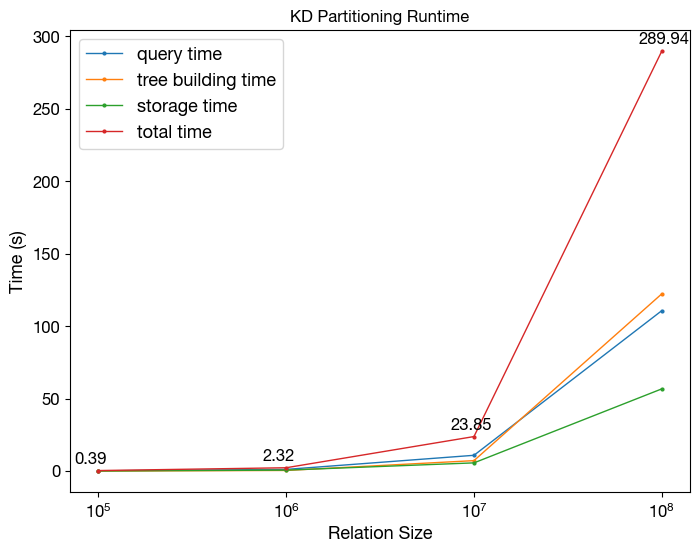

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(
    10**df_query.order, 
    df_query.time/1000, 
    color=colorWheel[0], 
    label='query time', 
    linestyle=linestyle, 
    lw=lw,
    marker=marker,
    markersize=markersize,
    markeredgecolor=colorWheel[0],
)


ax.plot(
    10**df_tree_building.order, 
    df_tree_building.time/1000, 
    label='tree building time', 
    color=colorWheel[1],
    linestyle=linestyle,
    lw=lw,
    marker=marker,
    markersize=markersize,
    markeredgecolor=colorWheel[1]
)

ax.plot(
    10**df_storage.order, 
    df_storage.time/1000, 
    label='storage time', 
    color=colorWheel[2],
    linestyle=linestyle,
    lw=lw,
    marker=marker,
    markersize=markersize,
    markeredgecolor=colorWheel[2],
)

ax.plot(
    10**df_total.order, 
    df_total.time/1000, 
    label='total time', 
    color=colorWheel[3],
    lw=lw,
    linestyle=linestyle,
    marker=marker,
    markerfacecolor=colorWheel[3],
    markersize=markersize
)
# ax.set_xticks([10e5, 10e6, 10e7, 10e8])
ax.set_xscale('log', base=10)
# ax.xaxis.set_major_formatter(ScalarFormatter())
ax.tick_params(axis='x', which='major')
plt.minorticks_off()
#ax.ticklabel_format(axis='x', style='sci')

for a, b in zip(10**df_total.order, df_total.time/1000):
        plt.text(a*0.75, b+5, '{:.2f}'.format(b))
plt.xlabel('Relation Size')
plt.ylabel('Time (s)')
plt.title('KD Partitioning Runtime')
plt.legend()
plt.savefig("kd-partition-runtime.pdf", transparent=True)